# Weight initialization

Based on lectures from Stanford's CS231n <a href="http://cs231n.stanford.edu/slides/2020/lecture_7.pdf">Training Neural Networks, Part 1</a>.

**Question:** *What happens when we start with inital weghts set to 0, i.e., `W = 0`?*

<img src="nn.png">

**Answer:** If every neuron in the network computes the same output, then they will also all compute the same gradients during backpropagation and undergo the same parameter updates. In other words, there is no source of asymmetry between neurons if their weights are initialized to be the same value. 

Therefore, one should initialize `W` with random weights to promote difference between neuron outputs. However, given a deep neural network, we learned that having really high weigts can lead to the *exploding gradient* problem and having really low weights can read to the *valishing gradient* problem. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def init_weight_plot(init_func, act_name):
    # assume some unit Guassian 10-D input data
    D = np.random.randn(1000, 500)
    hidden_layer_sizes = [500] * 10
    nonlinearities = [act_name] * len(hidden_layer_sizes)

    act = {'relu' : lambda x : np.maximum(0, x), 'tanh' : lambda x : np.tanh(x)}
    Hs = {}
    for i in range(len(hidden_layer_sizes)):
        X = D if i == 0 else Hs[i - 1] # input at this layer
        fan_in = X.shape[1]
        fan_out = hidden_layer_sizes[i]
        W = init_func(fan_in, fan_out)

        H = np.dot(X, W) # matrix multiply
        H = act[nonlinearities[i]](H) # nonlinearity
        Hs[i] = H

    # look at distributions at each layer
    print('input layer had mean %f and std %f' % (np.mean(D), np.std(D)))
    layer_means = [np.mean(H) for i, H in Hs.items()]
    layer_stds = [np.std(H) for i, H in Hs.items()]
    for i, H in Hs.items():
        print('hidden layer %d had mean %f and std %f' % (i + 1, layer_means[i], layer_stds[i]))

    # plot the means and standard devations
    plt.figure()
    plt.subplot(121)
    plt.plot(Hs.keys(), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(Hs.keys(), layer_stds, 'or-')
    plt.title('layer std')

    # plot the raw distributions
    fig, axes = plt.subplots(nrows = 1, ncols = 10, figsize=(15, 5))
    for i, ax in enumerate(axes.flat, start = 1):
        ax.hist(Hs[i - 1].ravel(), 30, range = (-1, 1))

    fig.tight_layout()
    plt.show()

input layer had mean 0.001315 and std 0.999378
hidden layer 1 had mean 0.006515 and std 0.213563
hidden layer 2 had mean 0.029621 and std 0.657276
hidden layer 3 had mean 0.055397 and std 0.927321
hidden layer 4 had mean 0.057166 and std 0.982435
hidden layer 5 had mean 0.054985 and std 0.994714
hidden layer 6 had mean 0.054283 and std 0.998071
hidden layer 7 had mean 0.053998 and std 0.998447
hidden layer 8 had mean 0.053995 and std 0.998450
hidden layer 9 had mean 0.053995 and std 0.998450
hidden layer 10 had mean 0.053995 and std 0.998450


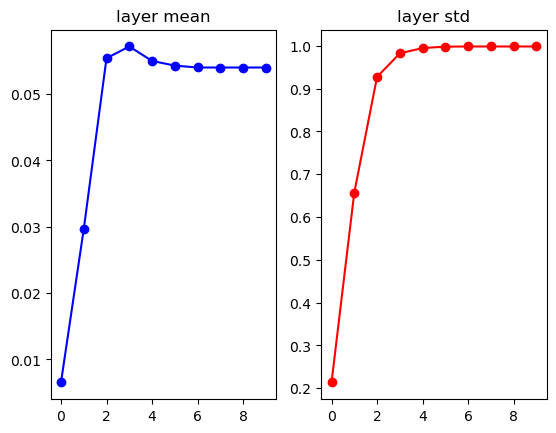

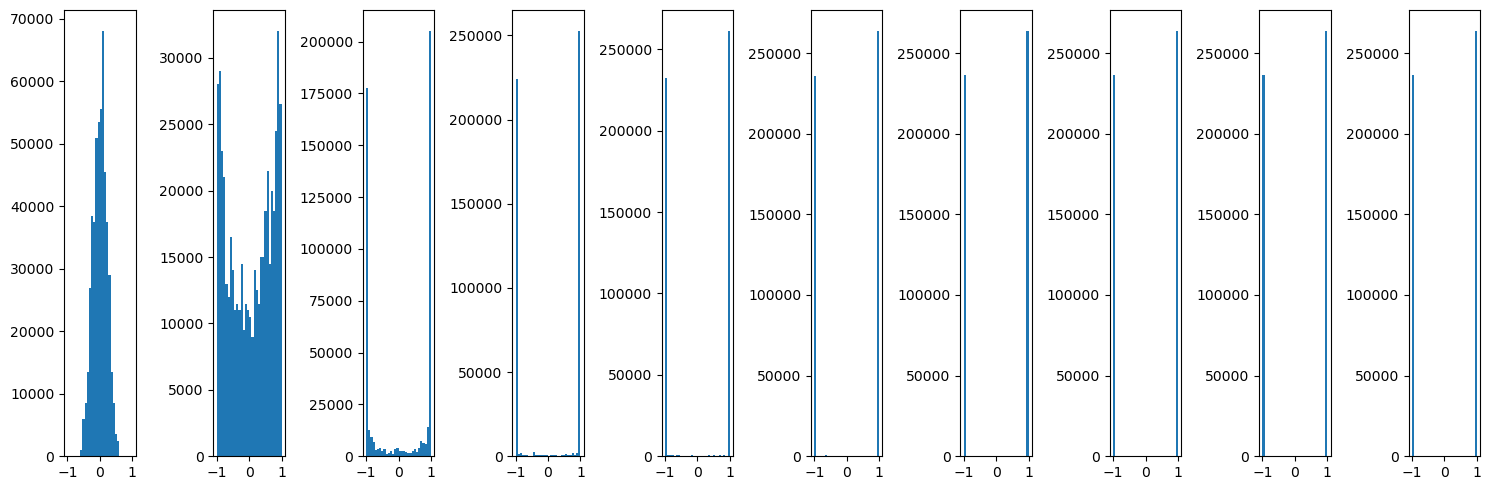

In [2]:
func = lambda x, y: np.ones((x, y)) * 0.01
init_weight_plot(func, 'tanh')

## Option 1: Initialize using small random weights

One common practice is to initialize the weights of the neurons to small numbers, which is also referred to as *breaking symmetry*. The idea is that the neurons will start as random and unique, and will thus compute distinct updates and integrate themeselves as diverse parts of the full network. A default choice is to use Gausian Normal values scaled by 1e-2.

$W = 0.01 * np.random.randn(n_{l-1},n_{l})$

where $n_{l-1}$ is the number of inputs and $n_{l}$ is the number of hidden units for the $l$-th layer.

<font color='maroon'>This tends to work well for small networks, but it is problematic still for deep networks, potentially leading to *valishing gradients* and dead nodes.</font>

Let's see an example. First, we will initialize with small random weights.

input layer had mean 0.002690 and std 0.998087
hidden layer 1 had mean -0.000820 and std 0.212616
hidden layer 2 had mean 0.000000 and std 0.047420
hidden layer 3 had mean -0.000006 and std 0.010634
hidden layer 4 had mean 0.000001 and std 0.002373
hidden layer 5 had mean 0.000000 and std 0.000532
hidden layer 6 had mean -0.000000 and std 0.000119
hidden layer 7 had mean 0.000000 and std 0.000027
hidden layer 8 had mean 0.000000 and std 0.000006
hidden layer 9 had mean -0.000000 and std 0.000001
hidden layer 10 had mean 0.000000 and std 0.000000


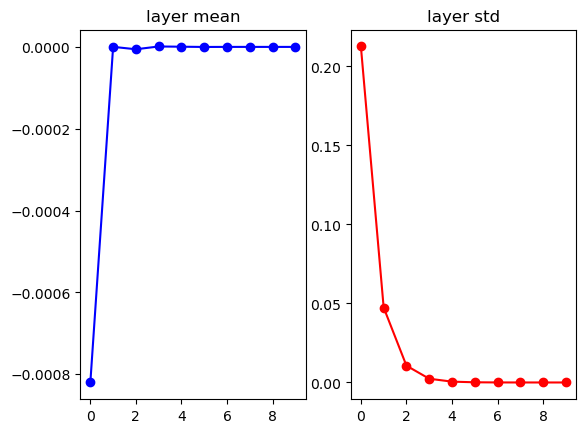

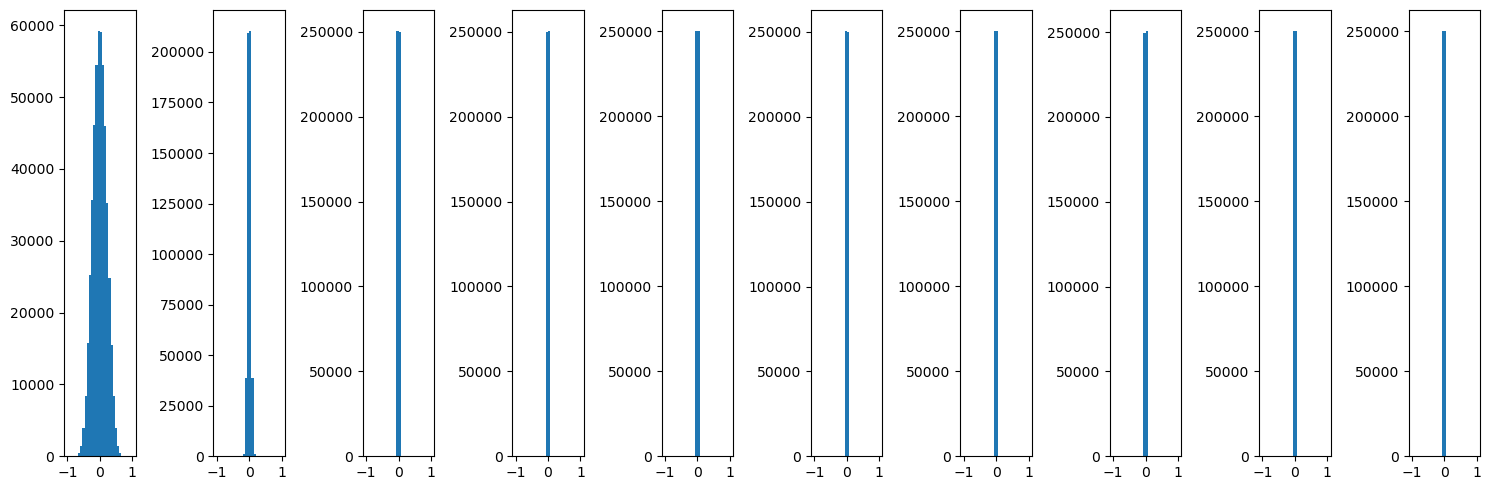

In [3]:
func = lambda x, y: np.random.randn(x, y) * 0.01
init_weight_plot(func, 'tanh')

**What happened?** <font color=maroon>Weights in the last layer are all 0 and we cannot make any useful prediction.</font> 

**Why did this happen?** Think about the backprop step. What do the gradients look like for one of the layers?

**Answer** Small weights will lead to small gradients (since the gradient is proportional to the value of the weights). This greatly diminshes the 'gradient signal' flowing backward through the network, and makes it hard to have clear predictions.

**What if we just increase the weights?**

input layer had mean -0.000734 and std 0.998586
hidden layer 1 had mean 0.001108 and std 0.981834
hidden layer 2 had mean -0.001027 and std 0.981460
hidden layer 3 had mean -0.000877 and std 0.981449
hidden layer 4 had mean -0.000497 and std 0.981606
hidden layer 5 had mean -0.002505 and std 0.981608
hidden layer 6 had mean 0.000280 and std 0.981800
hidden layer 7 had mean -0.001098 and std 0.981785
hidden layer 8 had mean 0.000217 and std 0.981794
hidden layer 9 had mean 0.000004 and std 0.981859
hidden layer 10 had mean -0.000152 and std 0.981638


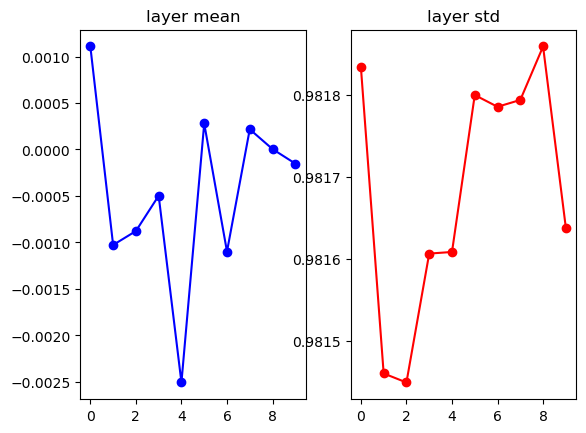

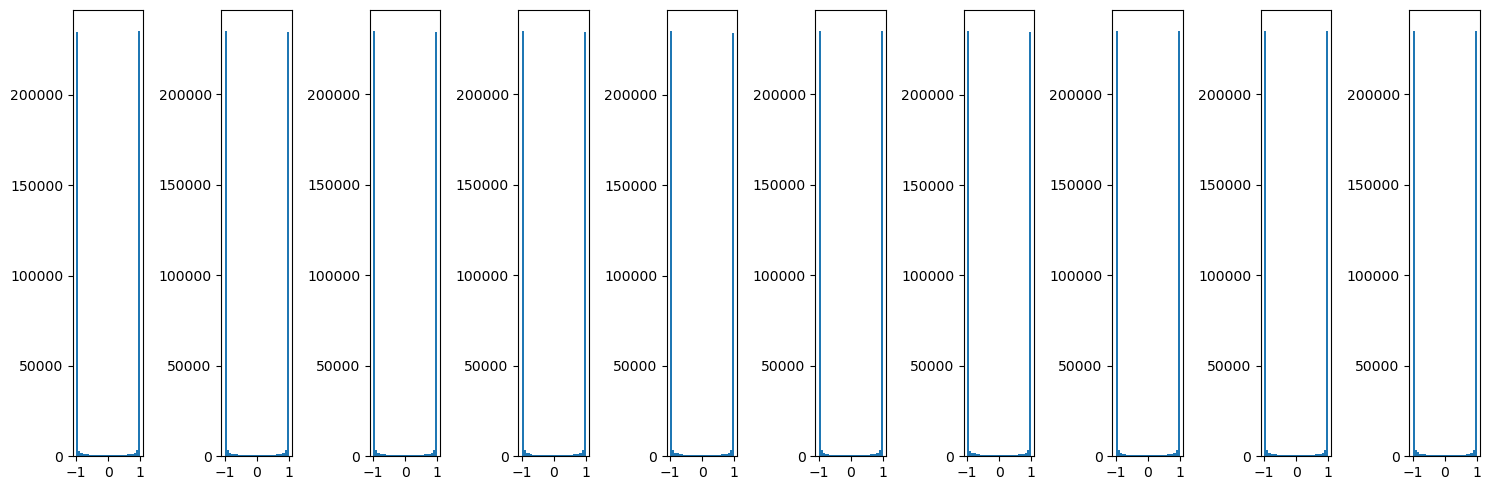

In [4]:
func = lambda x, y: np.random.randn(x, y) * 1.0
init_weight_plot(func, 'tanh')

This makes the neurons become saturated from the start, simply propagating -1 or 1 through the network layers.

## Option 2: Xavier Initialization <a href="http://proceedings.mlr.press/v9/glorot10a.html">[Glorot et al., 2010]</a>

Xavier Glorot and Yoshua Bengio showed that, in the case of linear activations, the distribution of the outputs in a neuron with randomly initialized weights has a variance that grows with the number of inputs. The higher the number of inputs, the higher the variance. They thus suggest normalizing the variance of each neuron's output to 1 by scaling its weight vector by the square root of its fan-in (i.e., its number of inputs), as follows. 

input layer had mean 0.000271 and std 0.999731
hidden layer 1 had mean 0.000267 and std 0.627661
hidden layer 2 had mean 0.000552 and std 0.484677
hidden layer 3 had mean 0.000544 and std 0.406348
hidden layer 4 had mean 0.000673 and std 0.356061
hidden layer 5 had mean 0.000420 and std 0.319411
hidden layer 6 had mean -0.000633 and std 0.292186
hidden layer 7 had mean 0.000027 and std 0.271256
hidden layer 8 had mean 0.000401 and std 0.255122
hidden layer 9 had mean 0.000029 and std 0.240066
hidden layer 10 had mean -0.000505 and std 0.227417


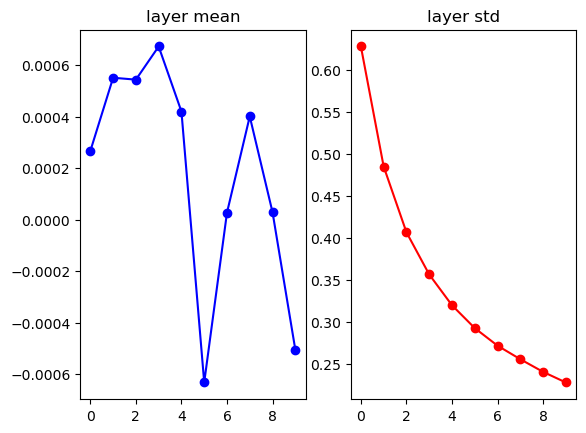

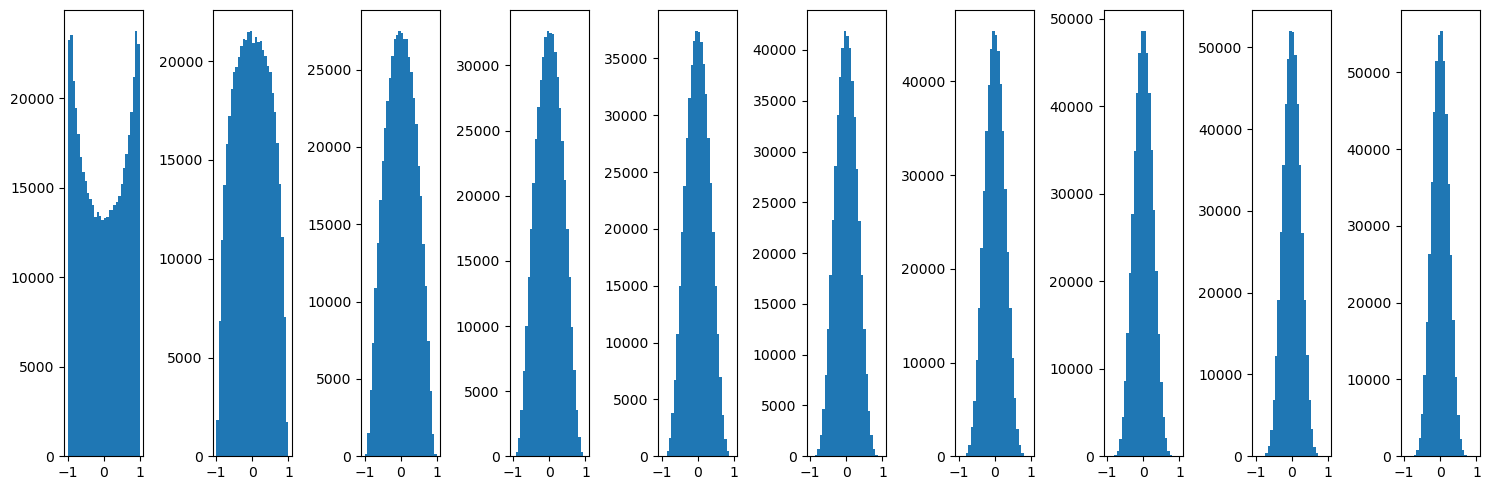

In [5]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'tanh')

**Why does it work?** Consider the dot product between the weight and input vector, $w^Tx$, which is the input to the non-linear activation function. For the case of simplicity, we'll ignore the bias term. Let us then examine the variance of the ouput values.

$
\begin{align}
Var(w^Tx) &= Var(\sum_i^n w_ix_i)\\
          &= \sum_i^n Var(w_ix_i)\\
          &= \sum_i^n [E(w_i)]^2 Var(x_i) + [E(x_i)]^2 Var(w_i) + Var(x_i)Var(w_i)\\
          &= \sum_i^n Var(x_i)Var(w_i)\\
          &= (nVar(w))Var(x)
\end{align}
$

The first 3 steps in the derivation are due to the properties of variance, while the 4th assumes that both the data and weights are mean centered (*note that will not be the case with outputs from ReLU activations*). The final step assumes an identical distribution of the $x_i$ and $w_i$ values.

If we wish to prevent exploding or vanishing gradients, we should strive for the variance of the activation inputs to be similar to the variance of the layer inputs. The consequence of the derivation above is that, if we want to maintain the variance of the inputs after the dot-product operation, the weights $w$ should be scaled in such a way that the $Var(w) = 1/n$, where $n$ is the number of inputs for the layer. Given that, for any scalar $a$ and random variable $X$, $Var(aX)=a^2Var(X)$, this implies that the initial weights should be unit Gaussian normal values scaled by $\sqrt{1/n}$, leading to weight vectors with variance $1/n$, just as we do in the Xavier Initialization.

## Xavier Initialization and ReLU activations

Unlike tanh gates, the output of the ReLU (and other activations) is non-negative, leading to non-zero positive mean, which breaks the assumptions above. And, as we will see, Xavier Initialization does not seem to work with ReLU nonlinearity.

input layer had mean 0.001434 and std 1.000788
hidden layer 1 had mean 0.400906 and std 0.587054
hidden layer 2 had mean 0.282564 and std 0.415763
hidden layer 3 had mean 0.195943 and std 0.287634
hidden layer 4 had mean 0.127225 and std 0.198367
hidden layer 5 had mean 0.093442 and std 0.134280
hidden layer 6 had mean 0.066277 and std 0.096925
hidden layer 7 had mean 0.044741 and std 0.067741
hidden layer 8 had mean 0.032085 and std 0.047451
hidden layer 9 had mean 0.023603 and std 0.034373
hidden layer 10 had mean 0.015521 and std 0.023524


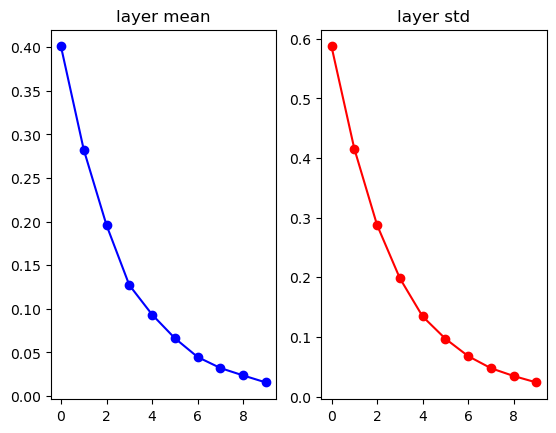

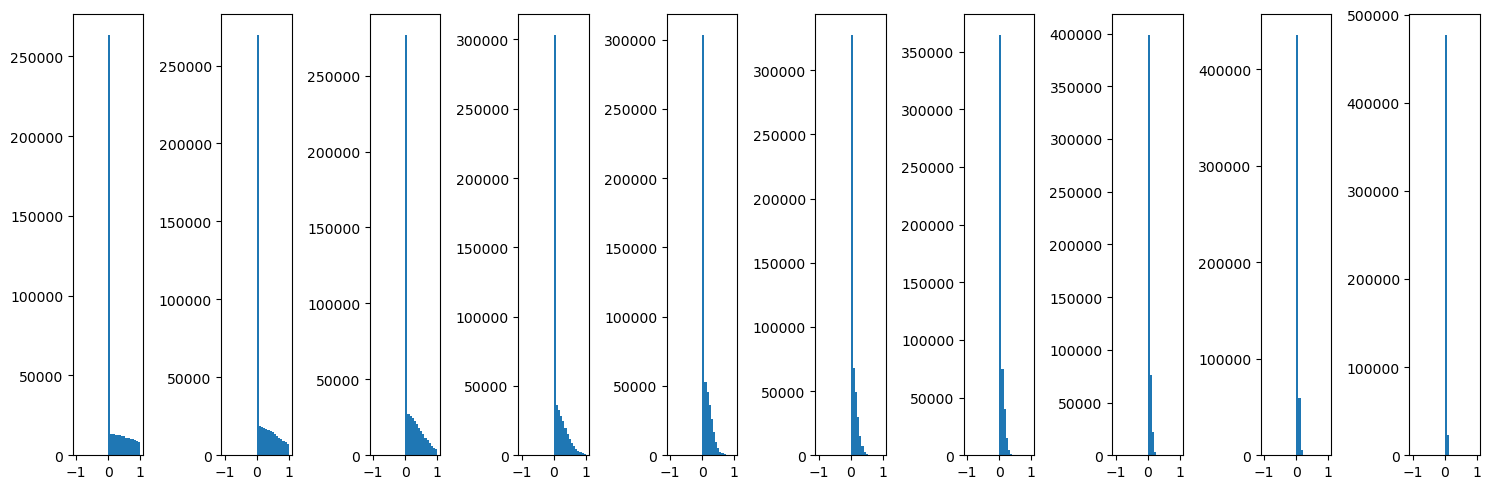

In [6]:
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x)
init_weight_plot(func, 'relu')

## He Initialization for ReLU activations <a href="https://arxiv.org/abs/1502.01852">[He et al., 2015]</a>

He et al. suggest that the variance of the neurons should be $2/n$ for ReLU activated nodes, rather than $1/n$, leading to initial weights drawn from a unit Gaussian normal and scaled by $\sqrt{2/n}$.

input layer had mean -0.000218 and std 1.000378
hidden layer 1 had mean 0.564202 and std 0.826064
hidden layer 2 had mean 0.559834 and std 0.828692
hidden layer 3 had mean 0.584089 and std 0.847168
hidden layer 4 had mean 0.532130 and std 0.805573
hidden layer 5 had mean 0.482012 and std 0.744006
hidden layer 6 had mean 0.534194 and std 0.738930
hidden layer 7 had mean 0.520789 and std 0.762761
hidden layer 8 had mean 0.501029 and std 0.736727
hidden layer 9 had mean 0.561454 and std 0.788807
hidden layer 10 had mean 0.550450 and std 0.798101


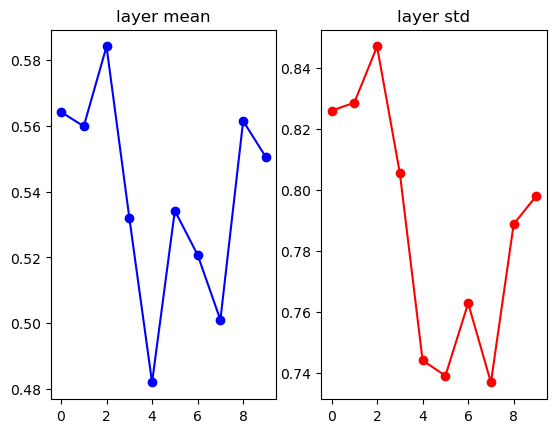

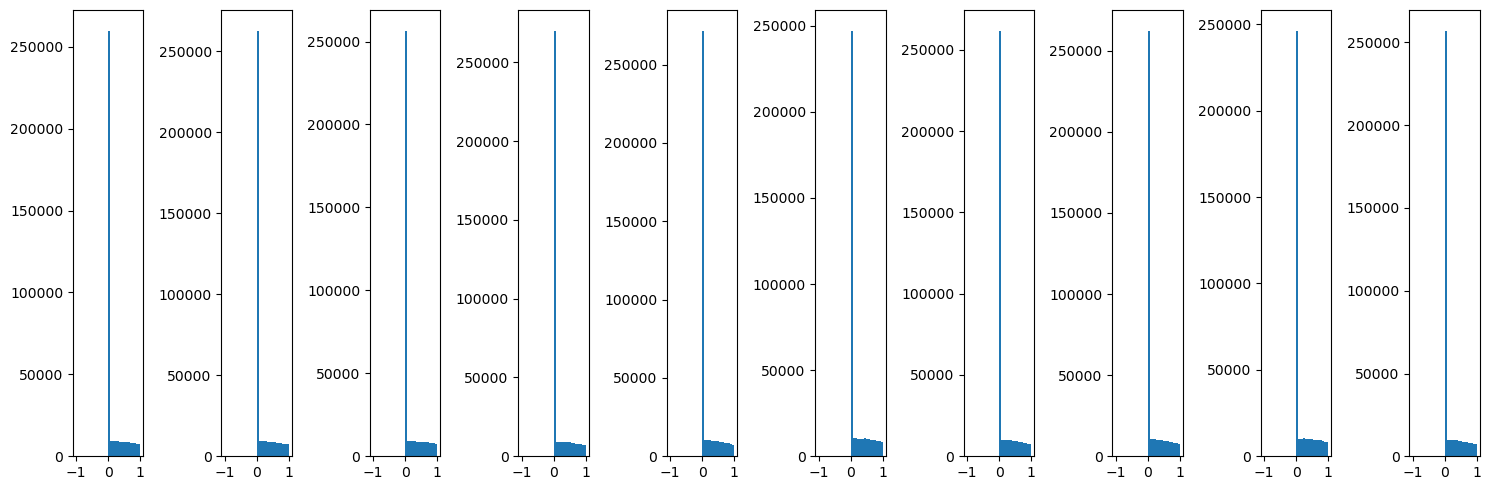

In [7]:
# note the sqrt(x/2) instead of sqrt(x)
func = lambda x, y: np.random.randn(x, y) / np.sqrt(x/2)
init_weight_plot(func, 'relu')